In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1.2

Consider a signal-plus-noise model of the general form $x_t = s_t + w_t$ where $w_t$ is gaussian white noise and $\sigma_w^2 = 1$. Simulate and plot $n=200$ observatio ns from each of the following two models.

![problem](./images/problem_1-2-a.png)

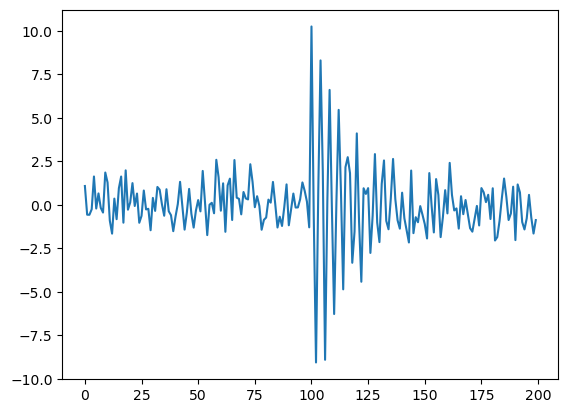

In [23]:
w = np.random.normal(0, 1, 200)
s = np.zeros(200)
generator_func = lambda t: 10 * np.exp(-1 * ((t-100) / 20)) * \
                    np.cos(2*np.pi*t/4)
s[100:] = generator_func(np.arange(100, 200))
x = s + w
plt.plot(x);

![problem](./images/problem_1-2-b.png)

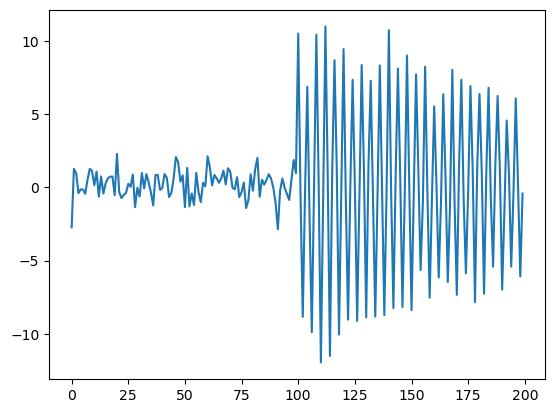

In [25]:
w = np.random.normal(0, 1, 200)
s = np.zeros(200)
generator_func = lambda t: 10 * np.exp(-1 * ((t-100) / 200)) * \
                    np.cos(2*np.pi*t/4)
s[100:] = generator_func(np.arange(100, 200))
x = s+w
plt.plot(x);

c) compare the general appearence of these two series with the earthquake and explosion series in figure 1.7


> series (a) resembles the explosion data, series (b) resembles earthquake data

# 1.3

a) generate n=100 observations from the autoregression 

$$
x_t = -.9 x_{t-2} + w_t
$$

with $\sigma_w = 1$ using method described in example 1.10. Then apply the moving average filter

$$
v_t = (x_t + x_{t-1} + x_{t-2} + x_{t-3}) / 4
$$

Then plot $x_t$ with $v_t$ superimposed

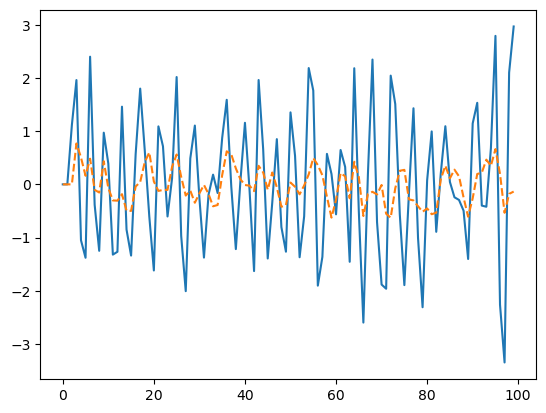

In [32]:
w = np.random.normal(0, 1, 100)
x = np.zeros(100)
for i in range(x.shape[0]):
    if i<2:
        continue
    x[i] = -0.9  * x[i-2] + w[i]
    
v = np.zeros(100)
for i in range(x.shape[0]):
    if i<3:
        continue
    v[i] = np.mean(x[i-3:i+1])
plt.plot(x)
plt.plot(v, '--')

> the moving average filter is reducing the amplitude of the signal and modeling longer-period oscillations than the original signal

b) repeat (a) but with 

$$
x_t = \cos(2\pi t / 4) + w_t
$$

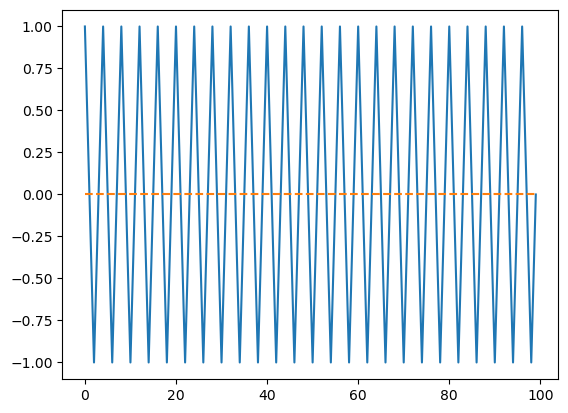

In [35]:
w = np.random.normal(0, 1, 100)
x = np.cos(2 * np.pi * np.arange(*w.shape) / 4)
    
v = np.zeros(100)
for i in range(x.shape[0]):
    if i<3:
        continue
    v[i] = np.mean(x[i-3:i+1])
plt.plot(x)
plt.plot(v, '--')

> The moving average is returning EXACTLY 0 - it's filtering out the entire cos signal

c) repeat (b) with with noise added

In [ ]:
w = np.random.normal(0, 1, 100)
x = np.cos(2 * np.pi * np.arange(*w.shape) / 4) + w
    
v = np.zeros(100)
for i in range(x.shape[0]):
    if i<3:
        continue
    v[i] = np.mean(x[i-3:i+1])
plt.plot(x)
plt.plot(v, '--')

> The 